# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA18 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA18issues.json

In [23]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [24]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA18issues.json')]

In [25]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [26]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

Author   State   closed_at  created_at  issue_number  \
0   AFA18SCM91A  closed  2018-11-21  2018-11-14           524   
1   AFA18SCM08J  closed  2018-11-14  2018-11-14           523   
2   AFA18SCM64A  closed  2018-11-12  2018-11-11           521   
3   AFA18SCM41A  closed  2018-11-13  2018-11-10           518   
4   AFA18SCM88F  closed  2018-11-12  2018-11-10           516   
5   CFA18SCM37A  closed  2018-11-12  2018-11-10           511   
6   AFA18SCM18K    open        None  2018-11-10           509   
7   AFA18SCM18K  closed  2018-11-10  2018-11-10           506   
8   CFA18SCM93S  closed  2018-11-12  2018-11-10           505   
9   SFA18SCM46N  closed  2018-11-12  2018-11-10           511   
10  KFA18SCM32K  closed  2018-11-12  2018-11-10           495   
11  DFA18SCM62P  closed  2018-11-12  2018-11-10           494   
12  MFA18SCM69L  closed  2018-11-12  2018-11-10           492   
13  MFA18SCM37H  closed  2018-11-12  2018-11-10           491   
14  AFA18SCM06M  closed  2018-11-13  2018-11-10           483   
15  JFA18SCM87M  closed  2018-11-12  2018-11-10           480   
16  CFA18SCM73P  closed  2018-11-12  2018-11-10           475   
17  WFA18SCM51Y  closed  2018-11-12  2018-11-10           473   
18  KFA18SCM70P  closed  2018-11-12  2018-11-10           469   
19  SFA18SCM73G  closed  2018-11-12  2018-11-10           464   

                                               labels  
0   [Category:Bug, DetectionPhase:Testing, Origina...  
1   [Category:Bug, DetectionPhase:Design, Originat...  
2   [Category:Bug, DetectionPhase:Testing, Origina...  
3   [Category:Inquiry, DetectionPhase:Field, Origi...  
4   [Category:Bug, DetectionPhase:Testing, Origina...  
5   [Category:Bug, DetectionPhase:Testing, Origina...  
6   [Category:Inquiry, DetectionPhase:Field, Origi...  
7   [Category:Inquiry, DetectionPhase:Field, Origi...  
8   [Category:Bug, DetectionPhase:Testing, Origina...  
9   [Category:Inquiry, DetectionPhase:Field, Origi...  
10  [Category:Inquiry, DetectionPhase:Field, Origi...  
11  [Category:Inquiry, DetectionPhase:Field, Origi...  
12  [Category:Bug, DetectionPhase:Testing, Origina...  
13  [Category:Bug, DetectionPhase:Testing, Origina...  
14  [Category:Inquiry, DetectionPhase:Field, Origi...  
15  [Category:Enhancement, DetectionPhase:Testing,...  
16  [Category:Inquiry, DetectionPhase:Field, Origi...  
17  [Category:Bug, DetectionPhase:Testing, Origina...  
18  [Category:Inquiry, DetectionPhase:Field, Origi...  
19  [Category:Enhancement, DetectionPhase:Testing,...

In [27]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [28]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0   AFA18SCM91A  closed  2018-11-21  2018-11-14           524   
1   AFA18SCM08J  closed  2018-11-14  2018-11-14           523   
2   AFA18SCM64A  closed  2018-11-12  2018-11-11           521   
3   AFA18SCM41A  closed  2018-11-13  2018-11-10           518   
4   AFA18SCM88F  closed  2018-11-12  2018-11-10           516   
5   CFA18SCM37A  closed  2018-11-12  2018-11-10           511   
6   AFA18SCM18K    open        None  2018-11-10           509   
7   AFA18SCM18K  closed  2018-11-10  2018-11-10           506   
8   CFA18SCM93S  closed  2018-11-12  2018-11-10           505   
9   SFA18SCM46N  closed  2018-11-12  2018-11-10           511   
10  KFA18SCM32K  closed  2018-11-12  2018-11-10           495   
11  DFA18SCM62P  closed  2018-11-12  2018-11-10           494   
12  MFA18SCM69L  closed  2018-11-12  2018-11-10           492   
13  MFA18SCM37H  closed  2018-11-12  2018-11-10           491   
14  AFA18SCM06M  closed  2018-11-13  2018-11-10           483   
15  JFA18SCM87M  closed  2018-11-12  2018-11-10           480   
16  CFA18SCM73P  closed  2018-11-12  2018-11-10           475   
17  WFA18SCM51Y  closed  2018-11-12  2018-11-10           473   
18  KFA18SCM70P  closed  2018-11-12  2018-11-10           469   
19  SFA18SCM73G  closed  2018-11-12  2018-11-10           464   

                                               labels  OriginationPhase  \
0   [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
1   [Category:Bug, DetectionPhase:Design, Originat...               NaN   
2   [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
3   [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
4   [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
5   [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
6   [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
7   [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
8   [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
9   [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
10  [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
11  [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
12  [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
13  [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
14  [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
15  [Category:Enhancement, DetectionPhase:Testing,...               NaN   
16  [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
17  [Category:Bug, DetectionPhase:Testing, Origina...               NaN   
18  [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
19  [Category:Enhancement, DetectionPhase:Testing,...               NaN   

    DetectionPhase  Category  Priority  Status  
0              NaN       NaN       NaN     NaN  
1              NaN       NaN       NaN     NaN  
2              NaN       NaN       NaN     NaN  
3              NaN       NaN       NaN     NaN  
4              NaN       NaN       NaN     NaN  
5              NaN       NaN       NaN     NaN  
6              NaN       NaN       NaN     NaN  
7              NaN       NaN       NaN     NaN  
8              NaN       NaN       NaN     NaN  
9              NaN       NaN       NaN     NaN  
10             NaN       NaN       NaN     NaN  
11             NaN       NaN       NaN     NaN  
12             NaN       NaN       NaN     NaN  
13             NaN       NaN       NaN     NaN  
14             NaN       NaN       NaN     NaN  
15             NaN       NaN       NaN     NaN  
16             NaN       NaN       NaN     NaN  
17             NaN       NaN       NaN     NaN  
18             NaN       NaN       NaN     NaN  
19             NaN       NaN       NaN     NaN

In [29]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [30]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0   AFA18SCM91A  closed  2018-11-21  2018-11-14           524   
1   AFA18SCM08J  closed  2018-11-14  2018-11-14           523   
2   AFA18SCM64A  closed  2018-11-12  2018-11-11           521   
3   AFA18SCM41A  closed  2018-11-13  2018-11-10           518   
4   AFA18SCM88F  closed  2018-11-12  2018-11-10           516   
5   CFA18SCM37A  closed  2018-11-12  2018-11-10           511   
6   AFA18SCM18K    open        None  2018-11-10           509   
7   AFA18SCM18K  closed  2018-11-10  2018-11-10           506   
8   CFA18SCM93S  closed  2018-11-12  2018-11-10           505   
9   SFA18SCM46N  closed  2018-11-12  2018-11-10           511   
10  KFA18SCM32K  closed  2018-11-12  2018-11-10           495   
11  DFA18SCM62P  closed  2018-11-12  2018-11-10           494   
12  MFA18SCM69L  closed  2018-11-12  2018-11-10           492   
13  MFA18SCM37H  closed  2018-11-12  2018-11-10           491   
14  AFA18SCM06M  closed  2018-11-13  2018-11-10           483   
15  JFA18SCM87M  closed  2018-11-12  2018-11-10           480   
16  CFA18SCM73P  closed  2018-11-12  2018-11-10           475   
17  WFA18SCM51Y  closed  2018-11-12  2018-11-10           473   
18  KFA18SCM70P  closed  2018-11-12  2018-11-10           469   
19  SFA18SCM73G  closed  2018-11-12  2018-11-10           464   

                                               labels OriginationPhase  \
0   [Category:Bug, DetectionPhase:Testing, Origina...     Requirements   
1   [Category:Bug, DetectionPhase:Design, Originat...     Requirements   
2   [Category:Bug, DetectionPhase:Testing, Origina...           Design   
3   [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
4   [Category:Bug, DetectionPhase:Testing, Origina...     Requirements   
5   [Category:Bug, DetectionPhase:Testing, Origina...     Requirements   
6   [Category:Inquiry, DetectionPhase:Field, Origi...    Documentation   
7   [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
8   [Category:Bug, DetectionPhase:Testing, Origina...     Requirements   
9   [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
10  [Category:Inquiry, DetectionPhase:Field, Origi...    Documentation   
11  [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
12  [Category:Bug, DetectionPhase:Testing, Origina...           Design   
13  [Category:Bug, DetectionPhase:Testing, Origina...           Design   
14  [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
15  [Category:Enhancement, DetectionPhase:Testing,...           Design   
16  [Category:Inquiry, DetectionPhase:Field, Origi...          Testing   
17  [Category:Bug, DetectionPhase:Testing, Origina...     Requirements   
18  [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
19  [Category:Enhancement, DetectionPhase:Testing,...           Design   

   DetectionPhase     Category  Priority         Status  
0         Testing          Bug     Major      Completed  
1          Design          Bug  Critical     inProgress  
2         Testing          Bug     Major       Approved  
3           Field      Inquiry      High     inProgress  
4         Testing          Bug  Critical       Approved  
5         Testing          Bug  Critical       Approved  
6           Field      Inquiry    Medium  pendingReview  
7           Field      Inquiry      High     inProgress  
8         Testing          Bug     Major      Completed  
9           Field      Inquiry      High     inProgress  
10          Field      Inquiry      High     inProgress  
11          Field      Inquiry    Medium  pendingReview  
12        Testing          Bug  Critical       Approved  
13        Testing          Bug     Major       Approved  
14          Field      Inquiry    Medium     inProgress  
15        Testing  Enhancement  Critical       Approved  
16          Field      Inquiry    Medium  pendingReview  
17        Testing          Bug  Critical    

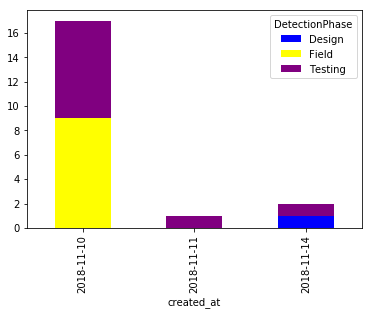

In [31]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

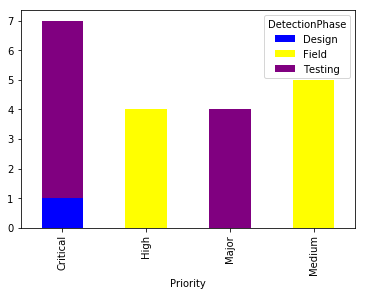

In [32]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

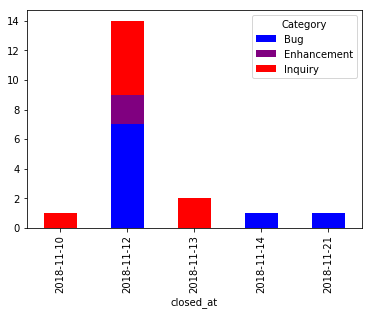

In [33]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)